# PROYECTO FINAL - Determinando rutas en un mapa previamente modelado en un DFA (Autómata finito determinista)

**Autómatas y Lenguajes Formales**

**Profesor: Luis Carlos Guayacán**
**Integrantes:**


*   Roger Fuentes 2221890
*   Juan Camilo Jaimes Ávila 2221882
*   Camilo Carvajal 2190187

**Escuela de Ingeniería de Sistemas e Informática**

_Julio de 2024_

# LIBRERIAS

In [13]:
!pip install automata-lib==1.0.0.post4
''' !pip install networkx
!pip install networkx matplotlib '''

' !pip install networkx\n!pip install networkx matplotlib '

# DESARROLLO




Este sería nuestro **mapa modelado** el cual corresponde a la ciudad de Chicago, cabe resaltar que la orientación del mapa debe ser la misma que en el modelado, esto representaría una limitación a considerar.


---



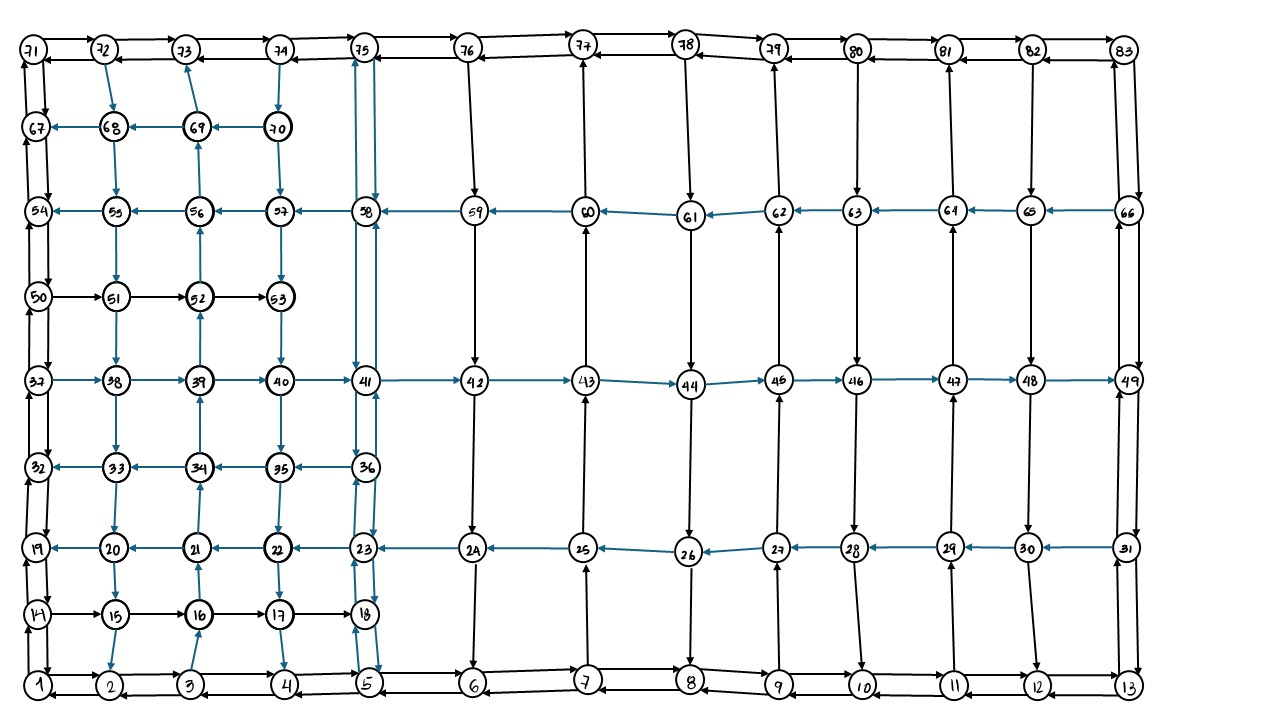

In [14]:
from automata.fa.dfa import DFA
from collections import deque

def crear_automata(puntos_de_interes, aristas, inicio, fin):
    estados = set(puntos_de_interes)
    input_symbols = {'l', 'u', 'r', 'd'}  # Alfabeto, son las direcciones posibles

    transitions = {state: {symbol: None for symbol in input_symbols} for state in estados}

    for (origen, destino, direccion) in aristas:
        transitions[origen][direccion] = destino

    dfa_transitions = {}
    for state, paths in transitions.items():
        dfa_transitions[state] = {}
        for symbol, next_state in paths.items():
            dfa_transitions[state][symbol] = next_state if next_state is not None else state

    #Se crea el autómata de la manera vista en clase
    dfa = DFA(
        states=estados,
        input_symbols=input_symbols,
        transitions=dfa_transitions,
        initial_state=inicio,
        final_states={fin}
    )

    return dfa

def encontrar_caminos(dfa, max_length=14, max_results=15):
    # Utilizar BFS (Búsqueda en Anchura) para generar caminos válidos
    queue = deque([(dfa.initial_state, "")])
    visitados = set()
    caminos_aceptados = []

    while queue and len(caminos_aceptados) < max_results:
        current_state, path = queue.popleft()

        if (current_state, path) in visitados or len(path) > max_length:
            continue

        visitados.add((current_state, path))
        if current_state in dfa.final_states:
            caminos_aceptados.append((path, len(path)))
            continue

        for symbol in dfa.input_symbols:
            next_state = dfa.transitions[current_state].get(symbol)
            if next_state and next_state != current_state:
                queue.append((next_state, path + symbol))

    return caminos_aceptados

# Implementación Caso de uso: Chicago

In [15]:
puntos_de_interes = [str(i) for i in range(1, 84)]
aristas = [
    ('1', '2', 'r'),  # 'r' para derecha
    ('1', '14', 'u'),  # 'u' para arriba
    ('2', '3', 'r'),  # 'd' para abajo
    ('2', '1', 'l'),  # 'l' para izq
    ('3', '2', 'l'),
    ('3', '4', 'r'),
    ('3', '16', 'u'),
    ('4', '5', 'r'),
    ('4', '3', 'l'),
    ('5', '6', 'r'),
    ('5', '4', 'l'),
    ('5', '18', 'u'),
    ('6', '7', 'r'),
    ('6', '5', 'l'),
    ('7', '8', 'r'),
    ('7', '6', 'l'),
    ('7', '25', 'u'),
    ('8', '9', 'r'),
    ('8', '7', 'l'),
    ('9', '10', 'r'),
    ('9', '8', 'l'),
    ('9', '27', 'u'),
    ('10', '11', 'r'),
    ('10', '9', 'l'),
    ('11', '12', 'r'),
    ('11', '10', 'l'),
    ('11', '29', 'u'),
    ('12', '13', 'r'),
    ('12', '11', 'l'),
    ('13', '12', 'l'),
    ('13', '31', 'u'),
    ('14', '15', 'r'),
    ('14', '19', 'u'),
    ('14', '1', 'd'),
    ('15', '16', 'r'),
    ('15', '2', 'd'),
    ('16', '17', 'r'),
    ('16', '21', 'u'),
    ('17', '18', 'r'),
    ('17', '4', 'd'),
    ('18', '23', 'u'),
    ('18', '5', 'd'),
    ('19', '32', 'u'),
    ('19', '14', 'd'),
    ('20', '19', 'l'),
    ('20', '15', 'd'),
    ('21', '20', 'l'),
    ('21', '34', 'u'),
    ('22', '21', 'l'),
    ('22', '17', 'd'),
    ('23', '22', 'l'),
    ('23', '18', 'd'),
    ('23', '36', 'u'),
    ('24', '23', 'l'),
    ('24', '6', 'd'),
    ('25', '24', 'l'),
    ('25', '43', 'u'),
    ('26', '25', 'l'),
    ('26', '8', 'd'),
    ('27', '26', 'l'),
    ('27', '45', 'u'),
    ('28', '27', 'l'),
    ('28', '10', 'd'),
    ('29', '28', 'l'),
    ('29', '47', 'u'),
    ('30', '29', 'l'),
    ('30', '12', 'd'),
    ('31', '30', 'l'),
    ('31', '49', 'u'),
    ('32', '37', 'u'),
    ('32', '19', 'd'),
    ('33', '26', 'l'),
    ('27', '45', 'u'),
    ('28', '27', 'l'),
    ('28', '10', 'd'),
    ('29', '28', 'l'),
    ('29', '47', 'u'),
    ('30', '29', 'l'),
    ('30', '12', 'd'),
    ('31', '30', 'l'),
    ('31', '49', 'u'),
    ('32', '37', 'u'),
    ('32', '19', 'd'),
    ('33', '26', 'l'),
    ('27', '45', 'u'),
    ('28', '27', 'l'),
    ('28', '10', 'd'),
    ('29', '28', 'l'),
    ('29', '47', 'u'),
    ('30', '29', 'l'),
    ('30', '12', 'd'),
    ('31', '30', 'l'),
    ('31', '49', 'u'),
    ('32', '37', 'u'),
    ('32', '19', 'd'),
    ('33', '32', 'l'),
    ('33', '20', 'u'),
    ('34', '33', 'l'),
    ('34', '39', 'u'),
    ('35', '34', 'l'),
    ('35', '22', 'd'),
    ('36', '23', 'd'),
    ('36', '41', 'u'),
    ('36', '35', 'l'),
    ('37', '50', 'u'),
    ('37', '38', 'r'),
    ('37', '32', 'd'),
    ('38', '39', 'r'),
    ('38', '33', 'd'),
    ('39', '40', 'r'),
    ('39', '52', 'u'),
    ('40', '41', 'r'),
    ('40', '35', 'd'),
    ('41', '58', 'u'),
    ('41', '42', 'r'),
    ('41', '36', 'd'),
    ('42', '43', 'r'),
    ('42', '24', 'd'),
    ('43', '44', 'r'),
    ('43', '60', 'u'),
    ('44', '45', 'r'),
    ('44', '26', 'd'),
    ('45', '46', 'r'),
    ('45', '62', 'u'),
    ('46', '47', 'r'),
    ('46', '28', 'd'),
    ('47', '48', 'r'),
    ('47', '64', 'u'),
    ('48', '49', 'r'),
    ('48', '30', 'd'),
    ('49', '66', 'u'),
    ('49', '31', 'd'),
    ('50', '54', 'u'),
    ('50', '51', 'r'),
    ('50', '37', 'd'),
    ('51', '52', 'r'),
    ('51', '38', 'd'),
    ('52', '53', 'r'),
    ('52', '56', 'u'),
    ('53', '40', 'd'),
    ('54', '67', 'u'),
    ('54', '50', 'd'),
    ('55', '54', 'l'),
    ('55', '51', 'd'),
    ('56', '55', 'l'),
    ('56', '69', 'u'),
    ('57', '56', 'l'),
    ('57', '53', 'd'),
    ('58', '57', 'l'),
    ('58', '75', 'u'),
    ('58', '41', 'd'),
    ('59', '58', 'l'),
    ('59', '42', 'd'),
    ('60', '59', 'l'),
    ('61', '60', 'l'),
    ('62', '79', 'u'),
    ('63', '62', 'l'),
    ('63', '46', 'd'),
    ('64', '63', 'l'),
    ('64', '81', 'u'),
    ('65', '64', 'l'),
    ('65', '48', 'd'),
    ('66', '65', 'l'),
    ('66', '83', 'u'),
    ('66', '49', 'd'),
    ('67', '71', 'u'),
    ('67', '54', 'd'),
    ('68', '67', 'l'),
    ('68', '55', 'd'),
    ('69', '73', 'u'),
    ('69', '68', 'l'),
    ('70', '69', 'l'),
    ('70', '57', 'd'),
    ('71', '72', 'r'),
    ('71', '67', 'd'),
    ('72', '71', 'l'),
    ('72', '73', 'r'),
    ('72', '68', 'd'),
    ('73', '72', 'l'),
    ('74', '73', 'l'),
    ('74', '70', 'd'),
    ('75', '74', 'l'),
    ('75', '58', 'd'),
    ('76', '75', 'l'),
    ('76', '59', 'd'),
    ('77', '76', 'l'),
    ('78', '77', 'l'),
    ('78', '61', 'd'),
    ('79', '78', 'l'),
    ('80', '79', 'l'),
    ('80', '63', 'l'),
    ('81', '80', 'l'),
    ('82', '81', 'l'),
    ('82', '65', 'd'),
    ('83', '82', 'l'),
    ('73', '74', 'r'),
    ('74', '75', 'r'),
    ('75', '76', 'r'),
    ('76', '77', 'r'),
    ('77', '78', 'r'),
    ('78', '79', 'r'),
    ('79', '80', 'r'),
    ('80', '81', 'r'),
    ('81', '82', 'r'),
    ('82', '83', 'r'),
    ('83', '66', 'd')
]

#Ejemplo
inicio = '58' #Punto de inicio
fin = '65'  #Punto de llegada

dfa = crear_automata(puntos_de_interes, aristas, inicio, fin)
caminos_aceptados = encontrar_caminos(dfa, max_length=14, max_results=15)
print("Caminos aceptados:")
for camino, longitud in caminos_aceptados:
    print(f"Camino: {camino}, Longitud: {longitud}")

Caminos aceptados:
Camino: urrrrrrrd, Longitud: 9
Camino: urrrrrrrrdl, Longitud: 11
Camino: urrrrrrrrld, Longitud: 11
Camino: urrrrrrrlrd, Longitud: 11
Camino: urrrrrrlrrd, Longitud: 11
Camino: urrrrlrrrrd, Longitud: 11
Camino: urrrlrrrrrd, Longitud: 11
Camino: urrlrrrrrrd, Longitud: 11
Camino: urlrrrrrrrd, Longitud: 11
Camino: udurrrrrrrd, Longitud: 11
Camino: ulrrrrrrrrd, Longitud: 11
Camino: duurrrrrrrd, Longitud: 11
Camino: drrrruurrrd, Longitud: 11
Camino: drrrrrruurd, Longitud: 11
Camino: drrrrrrrrul, Longitud: 11


# VERIFICACIONES EXTRA

In [18]:
for i in range(72, 83):
    print(f"('{i+1}', '{i}', 'l'),")
for i in range(72, 83):
    print(f"('{i}', '{i+1}', 'r'),")

('73', '72', 'l'),
('74', '73', 'l'),
('75', '74', 'l'),
('76', '75', 'l'),
('77', '76', 'l'),
('78', '77', 'l'),
('79', '78', 'l'),
('80', '79', 'l'),
('81', '80', 'l'),
('82', '81', 'l'),
('83', '82', 'l'),
('72', '73', 'r'),
('73', '74', 'r'),
('74', '75', 'r'),
('75', '76', 'r'),
('76', '77', 'r'),
('77', '78', 'r'),
('78', '79', 'r'),
('79', '80', 'r'),
('80', '81', 'r'),
('81', '82', 'r'),
('82', '83', 'r'),


In [19]:
puntos_de_interes = [str(i) for i in range(1, 84)]
print(puntos_de_interes)

['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '24', '25', '26', '27', '28', '29', '30', '31', '32', '33', '34', '35', '36', '37', '38', '39', '40', '41', '42', '43', '44', '45', '46', '47', '48', '49', '50', '51', '52', '53', '54', '55', '56', '57', '58', '59', '60', '61', '62', '63', '64', '65', '66', '67', '68', '69', '70', '71', '72', '73', '74', '75', '76', '77', '78', '79', '80', '81', '82', '83']
